In [3]:
%matplotlib inline
## IMPORTS ##
import numpy as np
import math as mth
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from matplotlib import colors as col
from matplotlib.colors import LogNorm
from work_experience_functions import *

# What is a pulsar?

<img src="files/pulsar_image.png" style="width: 500px; float: right;">

Pulsars are spherical, compact objects that are about the size of a large city but contain more mass than the sun. Scientists are using pulsars to study extreme states of matter, search for planets beyond Earth's solar system and measure cosmic distances. Pulsars also could help scientists find gravitational waves, which could point the way to energetic cosmic events like collisions between supermassive black holes. Discovered in 1967, pulsars are fascinating members of the cosmic community. 

From Earth, pulsars often look like flickering stars. On and off, on and off, they seem to blink with a regular rhythm. But the light from pulsars does not actually flicker or pulse. 

Pulsars radiate two steady, narrow beams of light in opposite directions. Although the light from the beam is steady, pulsars appear to flicker because they also spin. It's the same reason a lighthouse appears to blink when seen by a sailor on the ocean: As the pulsar rotates, the beam of light may sweep across the Earth, then swing out of view, then swing back around again. To an astronomer on the ground, the light goes in and out of view, giving the impression that the pulsar is blinking on and off. The reason a pulsar's light beam spins around like a lighthouse beam is that the pulsar's beam of light is typically not aligned with the pulsar's axis of rotation.



Because the "blinking" of a pulsar is caused by its spin, the rate of the pulses also reveals the rate at which the pulsar is spinning. Over 2,000 pulsars have been detected in total. Most of those rotate on the order of once per second (these are sometimes called "slow pulsars"), while more than 200 pulsars that rotate hundreds of times per second (called "millisecond pulsars") have been found. The fastest known millisecond pulsars can rotate more than 700 times per second. 

Pulsars aren't really stars — or at least they aren't "living" stars. Pulsars belong to a family of objects called neutron stars that form when a star more massive than the sun runs out of fuel in its core and collapses in on itself. This stellar death typically creates a massive explosion called a supernova. The neutron star is the dense nugget of material left over after this explosive death. 

source: space.com

# Dispersion Measures of Pulsars

As a pulse from a pulsar travels through space, it passes through free 'ionised' electrons in the interstellar medium.

These electrons cause the pulse arrival time at an observer to be delayed as a function of frequency: lower frequencies arrive later than higher frequencies (see link below). The effect is known as dispersion delay. The delay between two frequencies ($f_1$, $f_2$) and follows the equation:

$\Delta t\simeq4.15\times10^6$ ms $\times(f_1^{-2}-f_2^{-2})\times DM$

Where $DM$ is known as the dispersion measure.

The observed effect on a pulse is a characteristic sweep as a function of frequency.

The video in the link below visualises the time delay of low frequency radiation compared to higher frequencies when travelling through a cloud of free electrons: 
https://www.youtube.com/watch?v=VpS0sJCq9-M

## An observed, dispersed, pulsar

Below we plot some data representing a pulsar observation. This pulsar has been dispersed. 

In [4]:
# this code imports the full version
#stride = 8
#obs=np.loadtxt('frb_noise.txt')[::stride,:]
#np.save = np.save('frb_noise.npy',obs)
# we will use a downsampled version
# to speed up processing
obs = np.load('data/frb_noise.npy')

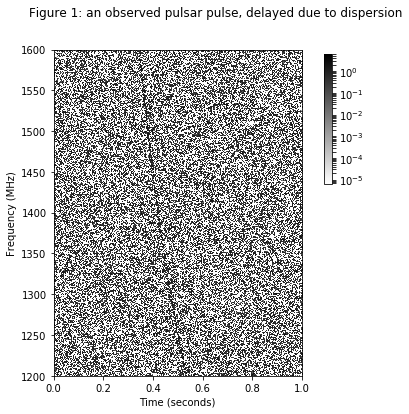

In [5]:
#define necessary constants (don't change these): 
b=400*(10**(-3))   # Frequency bandwidth of observation in GHz
mf=1200*(10**(-3)) # Minimum frequency of observation in GHz
st=5e-05 * 8          # Sampling time of observation in seconds
nt=np.size(obs,0)  # Number of times sampled during observation

#initialise plot
fig=plt.figure(figsize=(6,6))
fig.suptitle('Figure 1: an observed pulsar pulse, delayed due to dispersion',fontsize=12)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Frequency (MHz)')

extent = [0,nt*st,(mf)/(10**-3),(mf+b)/(10**-3)]
#plot original observation
im1 = ax1.imshow(obs.T,cmap='binary',aspect='auto',origin='lower',extent=extent, norm=col.LogNorm())

#colorbar
fig.subplots_adjust(right=0.7,wspace=0.8)
cbar_ax1 = fig.add_axes([0.75,0.57,0.02,0.3])
fig.colorbar(im1,cax=cbar_ax1)

plt.show()

## The dispersion measure (DM)

The dispersion measure is an important tool in pulsar astronomy. Its definition is:

$DM = \int^d_0 n_e dl$

Where $d$ is the distance between a pulsar and its observer, and $n_e$ is the electron density along the sightline. In words, DM is equal to the integrated electron column density along the line of sight, which essentially means it represents the total number of free electrons a pulse has passed through between the source and observer.

Because we know the relationship between DM and the delay of a pulse at a particular frequency, we can undo the using the correct DM.



## Why does DM matter?

The DM of a pulsar is a useful tool. Among other things, it allows us to estimate the distance to an observed source. If we assume $n_e$, the electron column density along the line of sight between source and observer to be constant, then for any given pulsar we observe, we can calculate its distance based on its location in the sky. All we need is a value for $n_e$.

Luckily, models such as NE2001 exist, which estimate $n_e$ along sightlines in the sky. These models are created using pulsars with known DMs and known distances, which are derived in other ways (for example using parallax measurements).

Below we plot the NE2001 model for the entire sky. Running horizontally along the center of the map is the Galactic Plane -- imagine you were looking at our Milky Way side-on.

The color refers to $n_e$, the electron density, at any particular galactic coordinate - you will see that close to the Galactic Plane of our Milky Way $n_e$ is much higher. Further from the Galactic Plane and Galactic Center, there are less stars, less matter, less ionised electrons, and thus, $n_e$ is smaller.

### The NE2001 model

The NE2001 model is a map of the electron density ($n_e$) distribution in the galaxy. This map is shown in the image below. The bright region with high electron density is in the direction of the Galactic plane. The electron density for stars can be found using this model. DM measurements together with the NE2001 model can be used to make estimates of the distance of pulsars. 

<img src="files/ne2001_image.png" style="width: 750px">

## Dedispersing a pulsar

Below, we show what happens when we dedisperse a pulsar by guessing its DM.

### Pick a DM

In [6]:
DM = 115 #note, choose something 250 or less for now

### Dedisperse the pulse


#### Functions
Dedisperse: Shifts all the observations made at a certain frequency with $\Delta t$(See formula for $\Delta t$).

    def dedisperse(dispersed_image,dispersion_measure,bandwidth,minfreq,sample_time):
    """
    Dedisperses an array containing a pulsar pulse.
    
    Note: the input image must have layout:
    columns -> frequencies (increasing), rows -> time (increasing)
    
    INPUTS:
    
    dispersed_image    : (array-like) a 2D array of frequencies and times to dedisperse
    dispersion_measure : (float) a DM to dedisperse the image at [pc cm^{-3}]
    bandwidth          : (float) the bandwidth of the observation [GHz]
    minfreq            : (float) the minimum frequency observed [GHz]
    sample_time        : (float) the sampling time of the observation [s]
    
    OUTPUTS:
    
    dedispersed_image : (array-like) the dedispersed image
    maxroll           : (int) the number of time samples which have rolled
                              from the end to the beginning of the observation
                              due to array manipulation. These should be cropped
                              before plotting, as they make no physical sense
    """

Crop: Crops all the times for which there isn't an observation at each frequency after shifting each row according to the DM.

    def crop(dedispersed_image,maxroll):
    """
    Crop time samples from dedispersed image which, after dedispersion,
    rolled from the end of the observation to the beginning.
    
    INPUTS:
    
    dedispersed_image : (array-like) the dedispersed image
    maxroll           : (int) the number of time samples which have rolled
                              from the end to the beginning of the observation
                              due to array manipulation. These should be cropped
                              before plotting, as they make no physical sense.
                              
    OUTPUTS:
    
    cropped_image : (array-like) cropped version of input image.
    
    """

#### Execute and plot

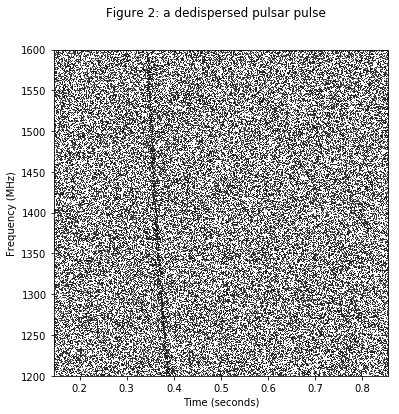

In [7]:
#dedisperse observed pulse
dedispersed_obs,mroll = dedisperse(obs,DM,b,mf,st) # dedisperse
dedispersed_obs = crop(dedispersed_obs,mroll)      # crop rollover

#initialise plot
fig=plt.figure(figsize=(6,6))
fig.suptitle('Figure 2: a dedispersed pulsar pulse',fontsize=12)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Frequency (MHz)')

# define the scaling parameters
extent = [(mroll*st),((nt*st)-(mroll*st)),(mf)/(10**-3),(mf+b)/(10**-3)]
#plot dedispersed pulse
im1=ax1.imshow(dedispersed_obs.T,cmap=cm.Greys,aspect='auto',origin='lower',extent=extent,norm=col.LogNorm())

#colorbar
#fig.subplots_adjust(right=0.7,wspace=0.8)
#cbar_ax1 = fig.add_axes([0.75,0.57,0.02,0.3])
#fig.colorbar(im1,cax=cbar_ax1)

plt.show()

## How do we know which DM to use?

At the time of arrival, the pulse will be brighter than any background noise observed by a telescope.

For a perfectly dedispersed pulse, summing the power over all frequencies at any given time will result in random noise, and at the time of the pulse, a bright spike containing all the pulse's power.

For a dispersed pulse, the pulse power is spread over a large time, and so the pulse will be harder to spot. 

#### Functions
Collapse: Sums the measured powers over all the frequencies.

    def collapse(cropped_image,sample_time,maxroll):
    """
    Collapses (sums) a cropped image into a 1-dimensional array over the frequency axis.
    Can be used to find the peak signal in the image vs time.
    
    INPUTS:
    
    cropped_image : (array-like) a 2D array of times (axis 0) and frequencies (axis 1) to collapse
    sample_time   : (float) the sampling time of the observation [s]
    maxroll       : (int) the number of time samples which have rolled
                          from the end to the beginning of the observation
                          due to array manipulation. These should be cropped
                          before plotting, as they make no physical sense.
    
    OUTPUTS:
    
    times     : (array-like) times to plot against collapsed observation
    collapsed : (array-like) observation, collapsed over frequency axis
    
    """

#### Execute and plot

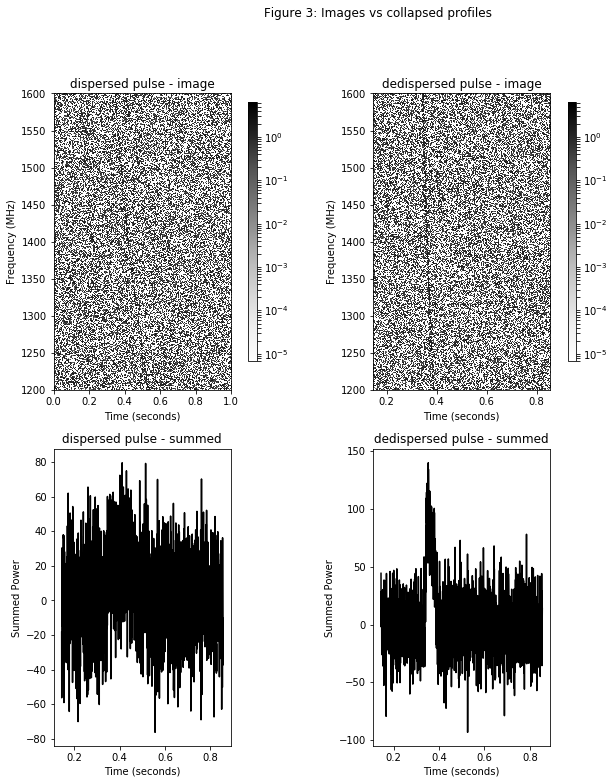

In [8]:
#collapse the original pulse
obs_cropped=crop(obs,mroll) #crop the original observation
obs_t,obs_signal=collapse(obs_cropped,st,mroll)

#collapse the dedispersed pulse
dedispersed_t,dedispersed_signal=collapse(dedispersed_obs,st,mroll)

#plot
fig=plt.figure(figsize=(12,12))

#axes
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

#titles
fig.suptitle('Figure 3: Images vs collapsed profiles', fontsize=12)
ax1.set_title('dispersed pulse - image')
ax2.set_title('dedispersed pulse - image')
ax3.set_title('dispersed pulse - summed')
ax4.set_title('dedispersed pulse - summed')

#xlabels
ax1.set_xlabel('Time (seconds)')
ax2.set_xlabel('Time (seconds)')
ax3.set_xlabel('Time (seconds)')
ax4.set_xlabel('Time (seconds)')

#ylabels
ax1.set_ylabel('Frequency (MHz)')
ax2.set_ylabel('Frequency (MHz)')
ax3.set_ylabel('Summed Power')
ax4.set_ylabel('Summed Power')

#plots
im1 = ax1.imshow(obs.T,cmap=cm.Greys,aspect='auto',origin='lower',extent=[0,nt*st,(mf)/(10**-3),(mf+b)/(10**-3)], norm=col.LogNorm())
im2 = ax2.imshow(dedispersed_obs.T,cmap=cm.Greys,aspect='auto',origin='lower',extent=[(mroll*st),((nt*st)-(mroll*st)),(mf)/(10**-3),(mf+b)/(10**-3)],norm=col.LogNorm())
im3 = ax3.plot(obs_t,obs_signal,label='signal',color='k')
im4 = ax4.plot(dedispersed_t,dedispersed_signal,label='signal',color='k')

#colorbars
fig.subplots_adjust(right=0.7,wspace=0.8)
cbar_ax1 = fig.add_axes([0.35,0.57,0.01,0.3])
cbar_ax2 = fig.add_axes([0.72,0.57,0.01,0.3])
fig.colorbar(im1,cax=cbar_ax1)
fig.colorbar(im2,cax=cbar_ax2)

plt.show()


## Pulse Signal-to-noise (S/N)

The closer you are to correctly guessing the DM of the pulsar, the higher it will stand out above background noise.

The signal to noise of our dedispersed pulse is shown below.

#### Functions
Sig_To_Noise: determines the ratio between the signal power and the noise power (signal/noise).

    def Sig_To_Noise(times,data,peakwidthestimate=100):
    """
    Get signal to noise ratio for timeseries data containing a peak.
    Uses an estimate of the peak width in bins, so it can be removed to get a more accurate noise estimate.
    
    INPUTS:
    
    times             : (array-like) times of input data
    data              : (array-like) timeseries data containing a peak
    peakwidthestimate : (int) estimate width of peak in bins
    
    OUTPUTS:
    
    SN      : (float) signal to noise ration of peak
    avnoise : (float) average value of noise in input array
    
    """

#### Execute and plot

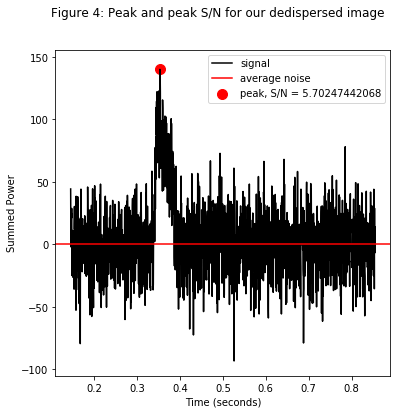

In [9]:
#calculate signal and noise
dedispersed_SN,dedispersed_avnoise=Sig_To_Noise(dedispersed_t,dedispersed_signal,100)

#find peak
dedispersed_peaktime,dedispersed_peak = findpeakinfo(dedispersed_t,dedispersed_signal)

#initialise plot
fig=plt.figure(figsize=(6,6))
fig.suptitle('Figure 4: Peak and peak S/N for our dedispersed image',fontsize=12)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Summed Power')

#plot signal
im1 = ax1.plot(dedispersed_t,dedispersed_signal,label='signal',color='k')
#plot average noise
im1 = ax1.axhline(dedispersed_avnoise,color='r',label='average noise')
#plot peak
im1 = ax1.scatter(dedispersed_peaktime,dedispersed_peak,color='r',s=100,label='peak, S/N = {}'.format(dedispersed_SN))

plt.legend()
plt.show()


## Exercise 1: Determine the DM for this pulsar

The pulse will only be dedispersed properly if the right DM is applied. In this exercise you will try to find the right dispersion measure for the data of pulsar in this notebook.

Hint: Make a graph (in excel) with the S/N on the y-axis and the applied DM on the x-axis.

## Exercise 2: What is the name of the pulsar that emitted this pulse? 
Below are 3 pulsars for which the distance has been determined using parallax measurements. The average electron density along their line of sight has also been determined using the NE2001 model. In this excercise you will use the relation between dispersion measure (DM), electron density ($n_{e}$) and distance (d). 

$DM = \int n_{e} dl$

For a constant electron density this relation is: $ DM = n_{e} \times d $

Using the table below you should now be able to verify the distance of our pulsar using the given electron densities and the DM determined earlier.

|Name        |Right ascention|Declination   | ne (cm^-3)         |d (pc) |
|------------|---------------|--------------|--------------------|-------|
|PSR B0531+21|05h 34m 31.97s |+22° 00' 52.1"|0.0284              |2000   |
|PSR B0833-45|08h 35m 20.66s |−45° 10' 35.2"|0.2429              |280    |
|PSR B2255+58|22h 57m 57.74s |+59° 09' 14.8"|0.0503              |3000   |
|PSR B0823+26|08h 26m 51.4s  |+26° 37' 23"  |0.0609              |320    |

## Exercise 3: Think of a way to automate finding the dispersion measure of a pulsar.

To automate this process a programming tool called a for-loop might come in handy. For loops allow you to do the same calculations for a list of different values. An example of a for-loop is shown below:

    Input:
    
    #Anything with a hashtag in front of it won't be evaluated by the program
    
    list = [0,1,2,3,4,278]        #List of things
    
    for element in list:
        times_four = element*4    #Anything within a for-loop is indented!
        print(times_four)
        
    Output:
    0
    4
    8
    12
    16
    1112
        
Now, think about what you want to calculate in your for-loop and what you want to use as your input. Let us know if you get stuck, we can give you a few hints!

Try coding one in the cell below:

## Exercise 4 (Bonus): See if you can find any interesting properties online for the pulsar we have studied in this session?

By now you should know the name of our pulsar! Try and google our pulsar's name and see what information you can find about this star. Other interesting pulsars to check out are the Crab pulsar and the Vela pulsar.